In [28]:
import ganja.io as io
import ganja.preprocessing as preprocessing

In [86]:
reload(io)
reload(preprocessing)

# import ROOT as RT

from glob import glob


base = '/mnt/t3nfs01/data01/shome/pandolf/CMSSW_5_3_32_Ganja/src/Ganja/GanjaTree/test/prod_oct25_v0/'
folder = 'QCD_Pt_80to120'
fnames = glob(base+'/'+folder+'/output/ganjaTree_[01234].root')

#arr,gen,reco 
%time df,gen,reco = io.read_root(fnames,'ganja/ganjaTree',rebin_as=(12,12,1),post_process=preprocessing.rescale_by_pt)


CPU times: user 3min 36s, sys: 366 ms, total: 3min 36s
Wall time: 3min 36s


In [95]:
import ganja.utils as utils

In [104]:
reload(utils)

nevents = utils.read_nevents(fnames,base,'data/nevents.json')
njets = gen.shape[0]

print(nevents,njets,float(njets)/nevents)

(176231, 352461, 1.9999943256294295)


In [87]:
df.describe()

,eta,etaGen,nPU,phi,phiGen,pt,ptGen,rho
count,352461.000000,352461.000000,352461.000000,352461.000000,352461.000000,352461.000000,352461.000000,352461.000000
mean,-0.000225,-0.000089,8.761945,-0.006007,-0.006119,84.167267,85.283653,5.424029
std,1.546269,1.547240,4.435939,1.813910,1.813914,21.934395,20.886995,2.974701
min,-4.687562,-4.710413,0.000000,-3.141585,-3.141544,3.125484,7.847940,0.000000
25%,-1.138489,-1.139890,5.000000,-1.585115,-1.584395,69.919983,72.549026,3.200039
50%,-0.002641,-0.002482,8.000000,-0.003553,-0.004180,83.441582,84.677437,4.943873
75%,1.138806,1.141617,12.000000,1.558898,1.560124,97.405785,97.513779,7.143637
max,4.500745,4.563290,37.000000,3.141581,3.141551,252.922119,272.560791,26.490225


In [92]:
def show(img,gen,reco,df):
    row = df.loc[img]
    # print(row)
    plt.figure(figsize=(15,3.5))
    plt.subplot(131)
    plt.title("gen (pt,eta) = (%1.2g,%1.2g)" % (row.ptGen,row.etaGen) )
    plt.xlabel('$\Delta \eta$')
    plt.ylabel('$\Delta \phi$')    
    plt.imshow(gen[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(132)
    plt.title("reco (pt,eta) = (%1.2g,%1.2g)" % (row.pt,row.eta) )
    plt.xlabel('$\Delta \eta$')
    plt.ylabel('$\Delta \phi$')    
    plt.imshow(reco[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(133)
    plt.title("reco-true (GeV/area)" )
    plt.xlabel('$\Delta \eta$')
    plt.ylabel('$\Delta \phi$')    
    plt.imshow( (reco[img,:,:,0]-gen[img,:,:,0])*row.ptGen,vmin=-5,vmax=5)
    plt.colorbar()
    plt.show()

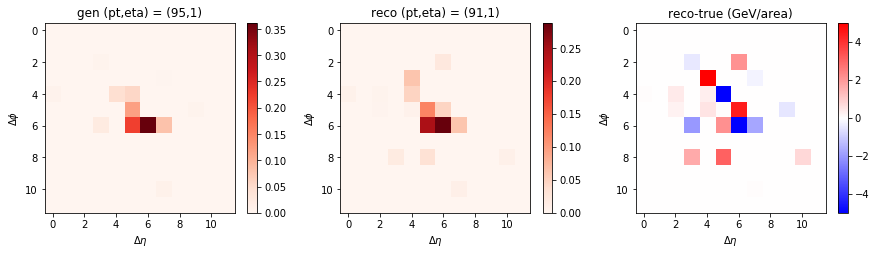

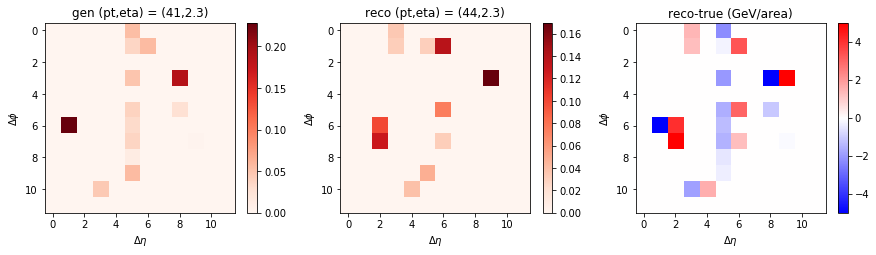

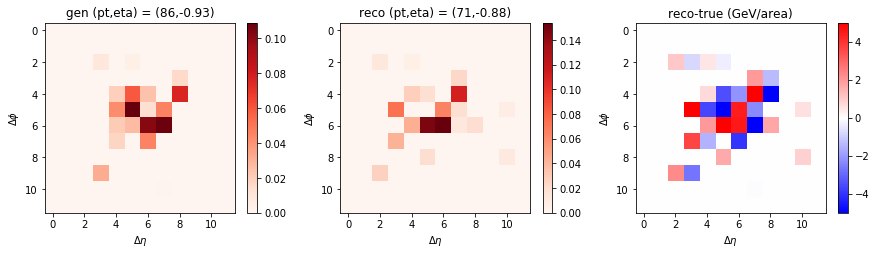

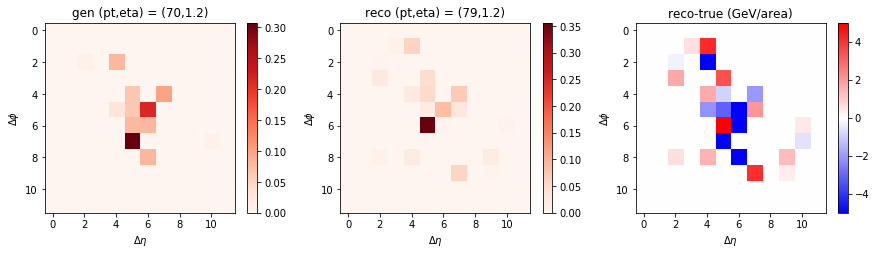

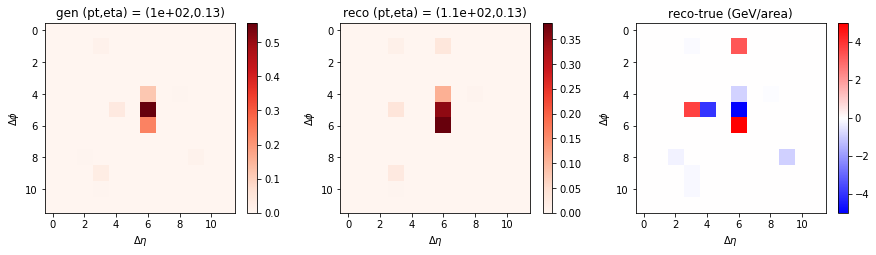

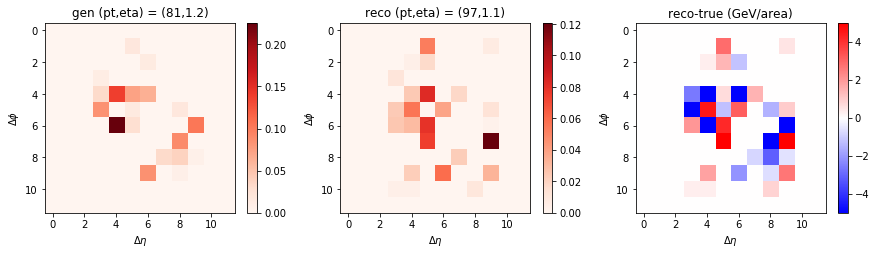

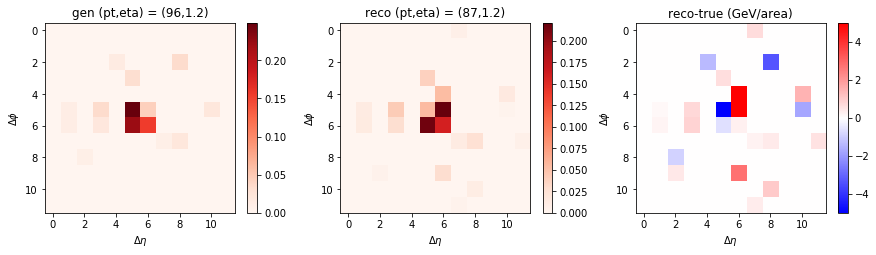

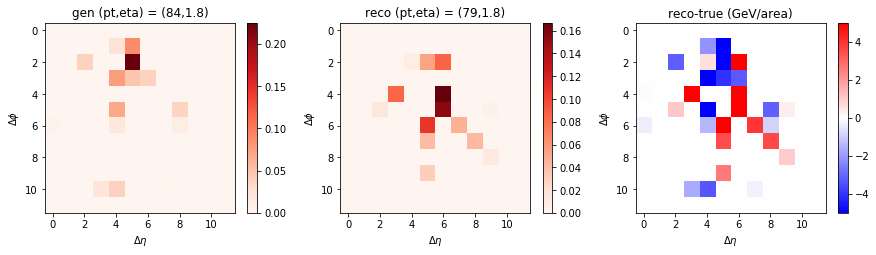

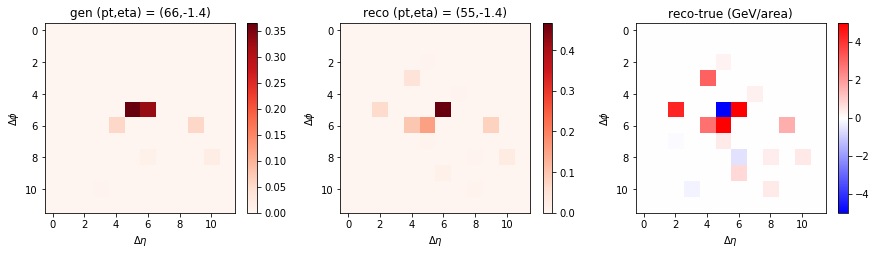

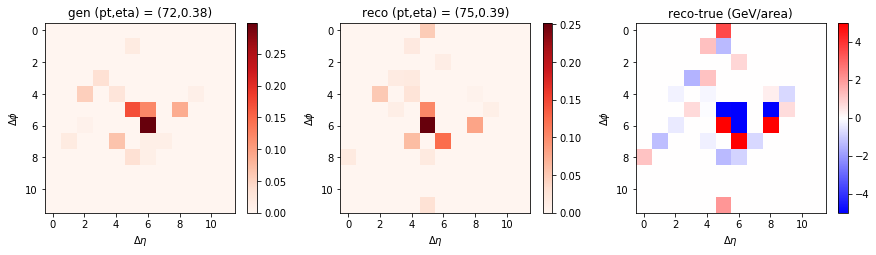

In [93]:
random_images = np.random.choice(df.index.values, 10)

for img in random_images:
    show(img,gen,reco,df)

In [111]:
reload(io)

io.write_out('.',folder,0,{'fnames' : fnames, 'nevents' : nevents}, df, gen, reco)